# Variação ou Dispersão

__Qual o objetivo desse tópico?__<br>
Entender se os valores estão espalhados ou compactados.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## DESVIO PADRÃO

* O desvio padrão é uma medida que nos informa o quanto nosso conjunto de dados está disperso.
* Quanto mais próximo ao 0 (zero) menos disperso os dados estão!
* O desvio padrão é a raiz quadrada da variância.
* O resultado do desvio padrão vem na mesma unidade da métrica que está sendo analisada, isso facilita e muito na hora da análise.

In [3]:
lst_1 = [1,1,1]

print("Média: {0}".format(np.mean(lst_1)))
print("Mediana: {0}".format(np.median(lst_1)))
print("STD: {0}".format(np.std(lst_1)))

Média: 1.0
Mediana: 1.0
STD: 0.0


In [4]:
lst_2 = [ 1, 2, 3, 4]

print("Média: {0}".format(np.mean(lst_2)))
print("Mediana: {0}".format(np.median(lst_2)))
print("STD: {0}".format(np.std(lst_2)))

Média: 2.5
Mediana: 2.5
STD: 1.118033988749895


In [5]:
lst_3 = [ 80, 1, 1000, 175, 200]

print("Média: {0}".format(np.mean(lst_3)))
print("Mediana: {0}".format(np.median(lst_3)))
print("STD: {0}".format(np.std(lst_3)))

Média: 291.2
Mediana: 175.0
STD: 361.39695626831167


In [6]:
df = pd.read_csv('pop_brasil.csv')
df.head()

,cidade,uf,populacao
0,SãoPaulo,SãoPaulo,12396372
1,RiodeJaneiro,RiodeJaneiro,6775561
2,Brasília,DistritoFederal,3094325
3,Salvador,Bahia,2900319
4,Fortaleza,Ceará,2703391


In [7]:
print("Média: {0}".format(np.mean(df['populacao'])))
print("Mediana: {0}".format(np.median(df['populacao'])))
print("STD: {0}".format(np.std(df['populacao'])))

Média: 38297.601256732494
Mediana: 11732.0
STD: 224268.01831921053


In [10]:
df.describe().round(2)

,populacao
count,5570.00
mean,38297.60
std,224288.15
min,771.00
25%,5454.00
50%,11732.00
75%,25764.75
max,12396372.00


<AxesSubplot:xlabel='populacao', ylabel='populacao'>

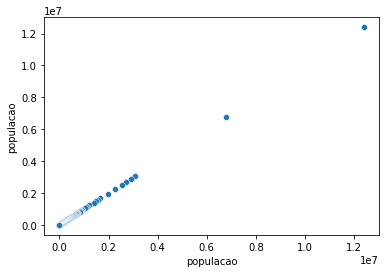

In [11]:
sns.scatterplot(
    data = df,
    x = 'populacao',
    y = 'populacao'
)

In [12]:
df_grupo = df.groupby(['uf']).agg({'populacao': [np.sum, np.mean, np.median, np.std], 'cidade': 'nunique'}).round(3).reset_index()

df_grupo.columns = ['uf', 'pop', 'media', 'mediana', 'std', 'qtd_cidade']

df_grupo.head()

,uf,pop,media,mediana,std,qtd_cidade
0,Acre,906876,41221.636,19685.0,86435.715,22
1,Alagoas,3365351,32993.637,17599.5,103384.097,102
2,Amapá,877613,54850.812,17098.5,128116.914,16
3,Amazonas,4269995,68870.887,26504.5,283285.104,62
4,Bahia,14985284,35935.933,17087.0,148074.654,417


In [13]:
df_grupo.head(27)

,uf,pop,media,mediana,std,qtd_cidade
0,Acre,906876,41221.636,19685.0,86435.715,22
1,Alagoas,3365351,32993.637,17599.5,103384.097,102
2,Amapá,877613,54850.812,17098.5,128116.914,16
3,Amazonas,4269995,68870.887,26504.5,283285.104,62
4,Bahia,14985284,35935.933,17087.0,148074.654,417
5,Ceará,9240580,50220.543,22327.5,201483.694,184
6,DistritoFederal,3094325,3094325.000,3094325.0,NaN,1
7,EspíritoSanto,4108508,52673.179,20588.0,101670.813,78
8,Goiás,7206589,29295.077,7646.5,112666.575,246
9,Maranhão,7153262,32964.341,18746.0,80379.191,217


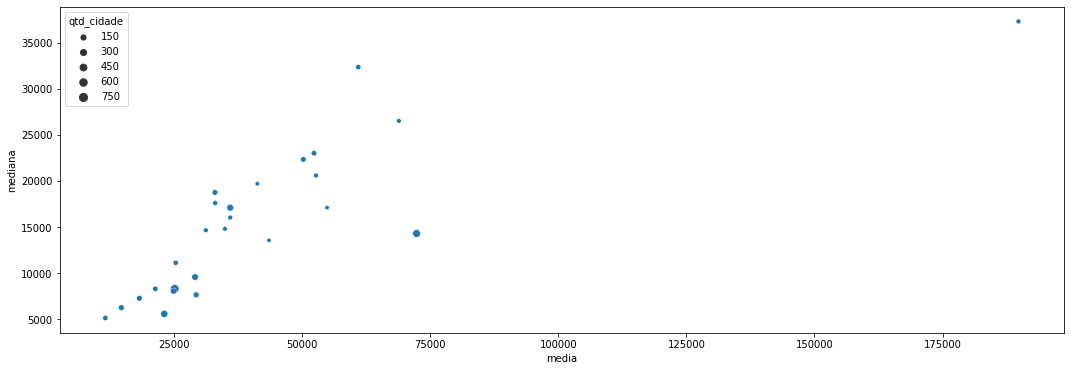

In [15]:
ax = sns.scatterplot(
    data = df_grupo[ df_grupo['uf'] != 'DistritoFederal'],
    x = 'media',
    y = 'mediana',
    size = 'qtd_cidade'
)

ax.figure.set_size_inches(18,6)

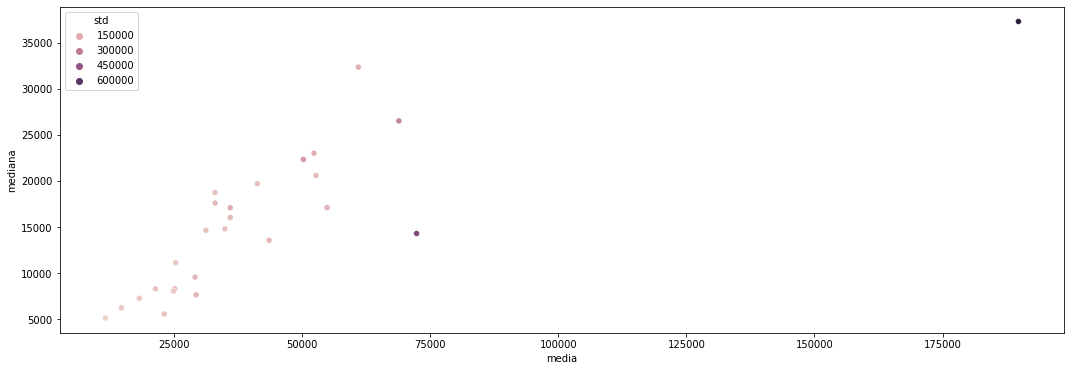

In [16]:
ax = sns.scatterplot(
    data = df_grupo[ df_grupo['uf'] != 'DistritoFederal'],
    x = 'media',
    y = 'mediana',
    hue = 'std'
)

ax.figure.set_size_inches(18,6)

In [ ]:
df['uf'].unique()

In [17]:
df_regiao = pd.DataFrame({
    'uf': ['SãoPaulo', 'RiodeJaneiro', 'DistritoFederal', 'Bahia', 'Ceará',
           'MinasGerais', 'Amazonas', 'Paraná', 'Pernambuco', 'Goiás', 'Pará',
           'RioGrandedoSul', 'Maranhão', 'Alagoas', 'MatoGrossodoSul',
           'RioGrandedoNorte', 'Piauí', 'Paraíba', 'Sergipe', 'MatoGrosso',
           'SantaCatarina', 'Rondônia', 'EspíritoSanto', 'Amapá', 'Roraima',
           'Acre', 'Tocantins'],
    
    'regiao': ['Suldeste', 'Suldeste', 'Centro-Oeste', 'Nordeste', 'Nordeste',
            'Suldeste', 'Norte', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte',
            'Sul', 'Nordeste', 'Nordeste', 'Centro-Oeste',
            'Nordeste', 'Nordeste', 'Nordeste', 'Nordeste', 'Centro-Oeste',
            'Sul', 'Norte', 'Suldeste', 'Norte', 'Norte',
            'Norte', 'Norte']
})

df_regiao.head()

,uf,regiao
0,SãoPaulo,Suldeste
1,RiodeJaneiro,Suldeste
2,DistritoFederal,Centro-Oeste
3,Bahia,Nordeste
4,Ceará,Nordeste


In [18]:
df_grupo = pd.merge(
    df_grupo, 
    df_regiao, 
    how = 'left', 
    on = 'uf'
)

df_grupo.head()

,uf,pop,media,mediana,std,qtd_cidade,regiao
0,Acre,906876,41221.636,19685.0,86435.715,22,Norte
1,Alagoas,3365351,32993.637,17599.5,103384.097,102,Nordeste
2,Amapá,877613,54850.812,17098.5,128116.914,16,Norte
3,Amazonas,4269995,68870.887,26504.5,283285.104,62,Norte
4,Bahia,14985284,35935.933,17087.0,148074.654,417,Nordeste


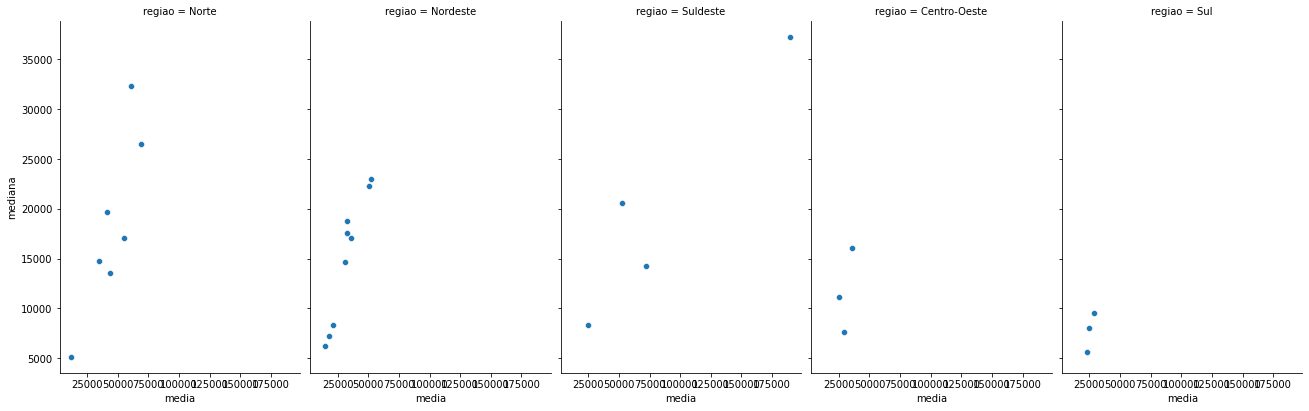

In [21]:
ax = sns.relplot(
    data = df_grupo[ df_grupo['uf'] != 'DistritoFederal'],
    x = 'media'
    , y = 'mediana'
    , col = 'regiao'
    , kind="scatter"
)

ax.figure.set_size_inches(18,6)

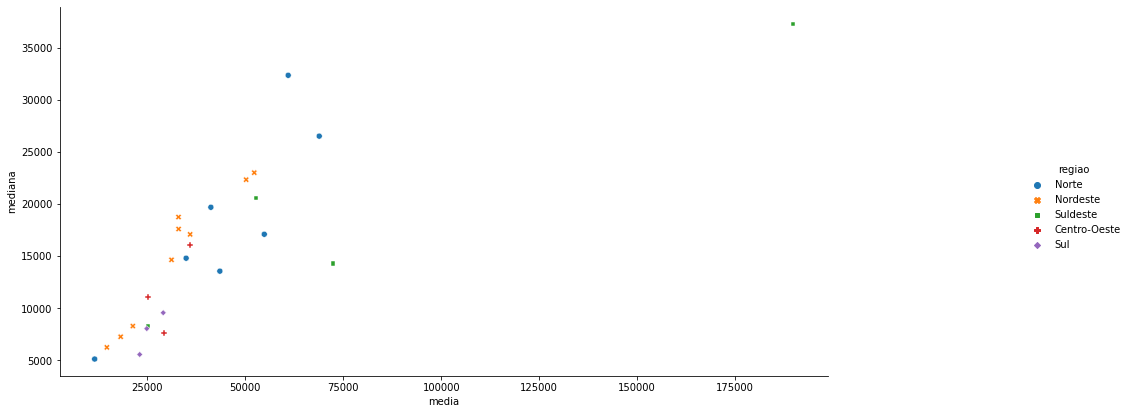

In [22]:
ax = sns.relplot(
    data = df_grupo[ df_grupo['uf'] != 'DistritoFederal'],
    x = 'media'
    , y = 'mediana'
    , kind="scatter"
    , hue = 'regiao'
    , style="regiao"
)

ax.figure.set_size_inches(18,6)